# tsam - 2. Example
Example usage of the time series aggregation module (tsam)
Date: 29.06.2019

Author: Maximilian Hoffmann

Import pandas and the relevant time series aggregation class

In [1]:
%load_ext autoreload
%autoreload 2
import copy
import os
import pandas as pd
import matplotlib.pyplot as plt
import tsam.timeseriesaggregation as tsam
%matplotlib inline

### Input data 

Read in time series from testdata.csv with pandas

In [2]:
raw = pd.read_csv('testdata.csv', index_col = 0)

Show a slice of the dataset

In [3]:
raw.head()

,GHI,T,Wind,Load
2009-12-31 23:30:00,0,-2.1,7.1,375.478394
2010-01-01 00:30:00,0,-2.8,8.6,364.541326
2010-01-01 01:30:00,0,-3.3,9.7,357.416844
2010-01-01 02:30:00,0,-3.2,9.8,350.191306
2010-01-01 03:30:00,0,-3.2,9.4,345.161449


Show the shape of the raw input data: 4 types of timeseries (GHI, Temperature, Wind and Load) for every hour in a year

In [4]:
raw.shape

(8760, 4)

Create a plot function for the temperature for a visual comparison of the time series

In [5]:
def plotTS(data, periodlength, vmin, vmax):
    fig, axes = plt.subplots(figsize = [6, 2], dpi = 100, nrows = 1, ncols = 1)
    stacked, timeindex = tsam.unstackToPeriods(copy.deepcopy(data), periodlength)
    cax = axes.imshow(stacked.values.T, interpolation = 'nearest', vmin = vmin, vmax = vmax)
    axes.set_aspect('auto')  
    axes.set_ylabel('Hour')
    plt.xlabel('Day')

    fig.subplots_adjust(right = 1.2)
    cbar=plt.colorbar(cax)    
    cbar.set_label('Wind [m/s]')

Plot an example series - in this case the wind speed

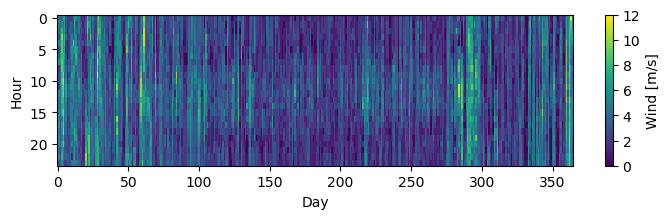

In [6]:
plotTS(raw['Wind'], 24, vmin = raw['Wind'].min(), vmax = raw['Wind'].max())

### Hierarchical aggregation

Initialize an aggregation class object with hierarchical clustering as method for eight typical days, without any integration of extreme periods. Alternative clusterMethod's are 'averaging','hierarchical' and 'k_medoids'.

In [7]:
aggregation = tsam.TimeSeriesAggregation(raw, noTypicalPeriods = 8, hoursPerPeriod = 24, 
                                        clusterMethod = 'hierarchical')

Create the typical periods

In [8]:
typPeriods = aggregation.createTypicalPeriods()

In [9]:
typPeriods

GHI        Load          T      Wind
  TimeStep                                             
0 0           0.000000  404.749377  -0.662325  3.499451
  1           0.000000  395.399863  -0.956596  4.432638
  2           0.000000  390.974340  -1.054687  3.032858
  3           0.000000  392.521756  -1.250867  2.799561
  4           0.000000  398.377664  -1.447048  2.566264
  5           0.000000  414.254932  -1.152777  1.166484
  6           9.788716  455.350313  -0.858506  1.166484
  7          92.448984  482.055159  -0.171874  1.166484
  8         183.810333  495.591798   0.710939  1.166484
  9         259.944790  504.577214   1.201390  1.166484
  10        315.414180  512.331632   1.888022  1.166484
  11        344.780328  525.716563   3.163196  2.332967
  12        348.043234  526.219365   4.046008  3.499451
  13        323.027626  518.204877   4.830731  3.499451
  14        270.821141  504.061408   3.555557  3.499451
  15        104.412970  495.756509   1.691842  3.499451
  16         57.644661  487.187205   0.710939  2.332967
  17         10.876351  486.376654   0.122397  2.332967
  18          0.000000  491.916143   0.024307  1.166484
  19          0.000000  504.213116   0.318577  2.332967
  20          0.000000  482.362908   0.710939  2.332967
  21          0.000000  474.079682   1.005209  3.499451
  22          0.000000  465.237304   1.005209  2.566264
  23          0.000000  454.799832   1.201390  4.082693
1 0           0.000000  373.805391  11.108509  3.499451
  1           0.000000  361.187666  10.912329  4.665935
  2           0.000000  353.992398  10.519968  2.332967
  3           0.000000  354.040077   9.833336  1.166484
  4           4.350540  362.982148  10.029516  1.166484
  5          40.242499  379.344880   9.931426  1.166484
...                ...         ...        ...       ...
6 18         17.402162  455.749087  20.623267  1.166484
  19          0.000000  450.846769  19.151913  1.166484
  20          0.000000  440.933771  18.171010  2.332967
  21          0.000000  437.119412  17.288197  2.332967
  22          0.000000  412.612157  16.699656  3.499451
  23          0.000000  384.034808  15.914933  3.499451
7 0           0.000000  402.764176   1.005209  2.332967
  1           0.000000  390.961336   1.005209  2.332967
  2           0.000000  389.591635   1.103300  2.332967
  3           0.000000  396.743558   1.103300  2.332967
  4           0.000000  404.489307   1.103300  3.499451
  5           0.000000  425.082509   1.201390  3.499451
  6           0.000000  481.110238   1.201390  3.499451
  7           0.000000  519.817311   1.495661  3.499451
  8          22.840337  529.704302   1.691842  3.499451
  9          55.469390  528.442963   1.789932  2.332967
  10         77.222092  531.152025   2.084203  2.332967
  11         88.098444  531.520457   2.378474  2.332967
  12         83.747903  530.553864   2.967015  2.332967
  13         67.433377  528.282587   3.163196  1.166484
  14         97.887159  526.466432   2.967015  1.166484
  15         19.577432  519.652600   1.789932  2.332967
  16          0.000000  519.596251   0.710939  1.166484
  17          0.000000  537.996198   0.122397  2.332967
  18          0.000000  537.835822  -0.073784  3.499451
  19          0.000000  523.878736  -0.956596  2.332967
  20          0.000000  498.981376  -1.250867  3.499451
  21          0.000000  481.023548  -1.741319  3.499451
  22          0.000000  456.516293  -1.839409  3.499451
  23          0.000000  424.306634  -2.133680  3.499451

[192 rows x 4 columns]

Show shape of typical periods: 4 types of timeseries for 8*24 hours

In [10]:
typPeriods.shape

(192, 4)

Repredict the original time series based on the typical periods

In [11]:
predictedPeriods = aggregation.predictOriginalData()

Plot the repredicted data

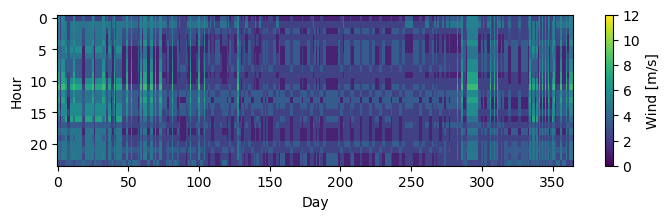

In [12]:
plotTS(predictedPeriods['Wind'], 24, vmin = raw['Wind'].min(), vmax = raw['Wind'].max())

### Now cluster the wind time series only

Clustering the solar time series only with 8 typical days and hierarchical clustering leads to different typical days in another sequence.

Isolate wind time series and show first lines of data

In [13]:
raw_wind=raw.loc[:,'Wind'].to_frame()
raw_wind.head()

,Wind
2009-12-31 23:30:00,7.1
2010-01-01 00:30:00,8.6
2010-01-01 01:30:00,9.7
2010-01-01 02:30:00,9.8
2010-01-01 03:30:00,9.4


Now same clustering procedure as above for the isolated wind time series

In [14]:
aggregation_wind = tsam.TimeSeriesAggregation(raw_wind, noTypicalPeriods = 8, hoursPerPeriod = 24, 
                                        clusterMethod = 'hierarchical')

In [15]:
typPeriods_wind = aggregation_wind.createTypicalPeriods()

Export for preprocess time series for testing

In [16]:
aggregation_wind.normalizedPeriodlyProfiles.to_csv(os.path.join('results','preprocessed_wind.csv'))

In [17]:
typPeriods_wind.shape

(192, 1)

In [18]:
predictedPeriods_wind = aggregation_wind.predictOriginalData()

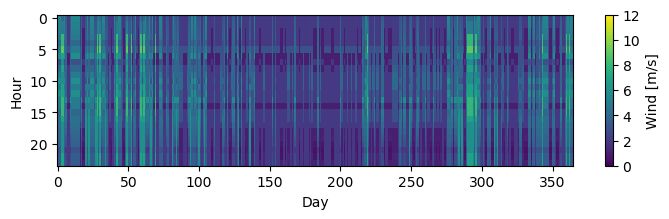

In [19]:
plotTS(predictedPeriods_wind['Wind'], 24, vmin = raw['Wind'].min(), vmax = raw['Wind'].max())

When we compare both plots, we see that 8 typical periods for wind only can better account extreme periods, but the cluster order in general changes

In [20]:
aggregation.clusterOrder

array([2, 2, 7, 2, 2, 2, 5, 7, 7, 5, 5, 2, 2, 5, 5, 5, 5, 5, 0, 0, 5, 5,
       5, 5, 5, 2, 0, 5, 5, 5, 5, 5, 2, 2, 5, 1, 5, 5, 7, 0, 2, 7, 5, 5,
       5, 5, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 7, 0, 2, 1, 2, 2, 2, 0, 0,
       2, 2, 0, 2, 0, 0, 2, 2, 1, 1, 1, 0, 7, 0, 0, 2, 0, 0, 0, 7, 1, 4,
       4, 4, 4, 3, 1, 0, 2, 0, 0, 0, 1, 1, 2, 0, 0, 1, 2, 1, 1, 3, 1, 4,
       4, 1, 3, 3, 3, 1, 1, 0, 0, 0, 4, 1, 3, 4, 4, 1, 1, 2, 2, 7, 6, 4,
       3, 1, 1, 3, 3, 4, 4, 6, 1, 6, 6, 1, 4, 4, 3, 4, 3, 4, 4, 4, 4, 3,
       3, 1, 1, 3, 6, 6, 6, 3, 3, 3, 3, 4, 4, 3, 3, 3, 3, 3, 6, 4, 6, 6,
       6, 3, 3, 4, 4, 1, 3, 6, 3, 6, 4, 4, 3, 3, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 3, 4, 4, 1, 3, 3, 3, 3, 4, 6, 6, 3, 3, 3, 3, 4, 4, 3, 3, 3, 3,
       3, 4, 4, 3, 3, 6, 6, 6, 4, 4, 3, 3, 6, 6, 6, 6, 4, 3, 3, 3, 3, 3,
       4, 4, 3, 3, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 4, 4, 3, 3, 1, 1, 1, 4,
       4, 3, 3, 1, 3, 1, 4, 4, 1, 1, 7, 1, 1, 4, 1, 1, 1, 1, 1, 2, 1, 1,
       2, 7, 7, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 7,

In [21]:
aggregation_wind.clusterOrder

array([0, 1, 1, 0, 0, 1, 3, 2, 2, 3, 1, 1, 1, 1, 1, 1, 7, 3, 6, 6, 4, 1,
       4, 1, 1, 1, 5, 4, 0, 1, 0, 3, 1, 1, 4, 5, 2, 7, 6, 2, 1, 3, 0, 1,
       1, 5, 7, 6, 5, 0, 5, 5, 0, 2, 5, 1, 2, 6, 5, 0, 4, 0, 1, 3, 3, 1,
       4, 1, 2, 0, 2, 2, 1, 1, 5, 2, 2, 3, 5, 2, 2, 4, 1, 3, 4, 3, 7, 7,
       7, 2, 2, 2, 7, 3, 4, 1, 5, 1, 3, 5, 4, 3, 2, 3, 4, 1, 2, 2, 2, 6,
       2, 5, 2, 2, 2, 7, 7, 5, 3, 2, 1, 2, 6, 7, 3, 3, 2, 1, 4, 6, 1, 2,
       2, 6, 7, 2, 4, 7, 7, 1, 2, 2, 2, 6, 2, 2, 7, 2, 2, 2, 2, 2, 3, 2,
       5, 2, 2, 2, 6, 6, 2, 6, 2, 7, 7, 2, 7, 2, 3, 2, 2, 6, 2, 2, 7, 2,
       2, 2, 7, 2, 7, 6, 6, 6, 3, 6, 7, 6, 6, 2, 2, 2, 2, 2, 6, 6, 2, 2,
       2, 2, 3, 7, 2, 6, 2, 7, 2, 2, 7, 2, 2, 7, 6, 2, 2, 6, 3, 5, 1, 0,
       3, 7, 2, 7, 3, 2, 7, 7, 2, 3, 3, 6, 2, 2, 6, 6, 6, 7, 7, 7, 7, 2,
       5, 3, 2, 3, 3, 2, 2, 4, 3, 7, 6, 2, 5, 3, 7, 2, 7, 7, 3, 2, 7, 7,
       6, 2, 3, 7, 6, 7, 6, 7, 2, 2, 6, 2, 1, 1, 5, 3, 6, 3, 3, 1, 4, 3,
       4, 2, 6, 1, 0, 0, 0, 0, 4, 1, 0, 1, 1, 3, 2,

### Predefining cluster sequence

tsam offers the option to aggregate input time series for a predefined cluster order. This means that we can take the cluster Order from the wind time series only and set it as input for the aggregation process for all attributes

In [22]:
aggregation_predefClusterOrder = tsam.TimeSeriesAggregation(raw, noTypicalPeriods = 8, hoursPerPeriod = 24, 
                                 clusterMethod = 'hierarchical', 
                                 predefClusterOrder=aggregation_wind.clusterOrder)

In [23]:
typPeriods_predefClusterOrder = aggregation_predefClusterOrder.createTypicalPeriods()

In [24]:
typPeriods_predefClusterOrder.shape

(192, 4)

Save typical periods to .csv file

In [25]:
typPeriods_predefClusterOrder.to_csv(os.path.join('results','testperiods_predefClusterOrder.csv'))

In [26]:
predictedPeriods_predefClusterOrder = aggregation_predefClusterOrder.predictOriginalData()

Now we compare the cluster orders

In [27]:
aggregation_wind.clusterOrder

array([0, 1, 1, 0, 0, 1, 3, 2, 2, 3, 1, 1, 1, 1, 1, 1, 7, 3, 6, 6, 4, 1,
       4, 1, 1, 1, 5, 4, 0, 1, 0, 3, 1, 1, 4, 5, 2, 7, 6, 2, 1, 3, 0, 1,
       1, 5, 7, 6, 5, 0, 5, 5, 0, 2, 5, 1, 2, 6, 5, 0, 4, 0, 1, 3, 3, 1,
       4, 1, 2, 0, 2, 2, 1, 1, 5, 2, 2, 3, 5, 2, 2, 4, 1, 3, 4, 3, 7, 7,
       7, 2, 2, 2, 7, 3, 4, 1, 5, 1, 3, 5, 4, 3, 2, 3, 4, 1, 2, 2, 2, 6,
       2, 5, 2, 2, 2, 7, 7, 5, 3, 2, 1, 2, 6, 7, 3, 3, 2, 1, 4, 6, 1, 2,
       2, 6, 7, 2, 4, 7, 7, 1, 2, 2, 2, 6, 2, 2, 7, 2, 2, 2, 2, 2, 3, 2,
       5, 2, 2, 2, 6, 6, 2, 6, 2, 7, 7, 2, 7, 2, 3, 2, 2, 6, 2, 2, 7, 2,
       2, 2, 7, 2, 7, 6, 6, 6, 3, 6, 7, 6, 6, 2, 2, 2, 2, 2, 6, 6, 2, 2,
       2, 2, 3, 7, 2, 6, 2, 7, 2, 2, 7, 2, 2, 7, 6, 2, 2, 6, 3, 5, 1, 0,
       3, 7, 2, 7, 3, 2, 7, 7, 2, 3, 3, 6, 2, 2, 6, 6, 6, 7, 7, 7, 7, 2,
       5, 3, 2, 3, 3, 2, 2, 4, 3, 7, 6, 2, 5, 3, 7, 2, 7, 7, 3, 2, 7, 7,
       6, 2, 3, 7, 6, 7, 6, 7, 2, 2, 6, 2, 1, 1, 5, 3, 6, 3, 3, 1, 4, 3,
       4, 2, 6, 1, 0, 0, 0, 0, 4, 1, 0, 1, 1, 3, 2,

In [28]:
aggregation_predefClusterOrder.clusterOrder

array([0, 1, 1, 0, 0, 1, 3, 2, 2, 3, 1, 1, 1, 1, 1, 1, 7, 3, 6, 6, 4, 1,
       4, 1, 1, 1, 5, 4, 0, 1, 0, 3, 1, 1, 4, 5, 2, 7, 6, 2, 1, 3, 0, 1,
       1, 5, 7, 6, 5, 0, 5, 5, 0, 2, 5, 1, 2, 6, 5, 0, 4, 0, 1, 3, 3, 1,
       4, 1, 2, 0, 2, 2, 1, 1, 5, 2, 2, 3, 5, 2, 2, 4, 1, 3, 4, 3, 7, 7,
       7, 2, 2, 2, 7, 3, 4, 1, 5, 1, 3, 5, 4, 3, 2, 3, 4, 1, 2, 2, 2, 6,
       2, 5, 2, 2, 2, 7, 7, 5, 3, 2, 1, 2, 6, 7, 3, 3, 2, 1, 4, 6, 1, 2,
       2, 6, 7, 2, 4, 7, 7, 1, 2, 2, 2, 6, 2, 2, 7, 2, 2, 2, 2, 2, 3, 2,
       5, 2, 2, 2, 6, 6, 2, 6, 2, 7, 7, 2, 7, 2, 3, 2, 2, 6, 2, 2, 7, 2,
       2, 2, 7, 2, 7, 6, 6, 6, 3, 6, 7, 6, 6, 2, 2, 2, 2, 2, 6, 6, 2, 2,
       2, 2, 3, 7, 2, 6, 2, 7, 2, 2, 7, 2, 2, 7, 6, 2, 2, 6, 3, 5, 1, 0,
       3, 7, 2, 7, 3, 2, 7, 7, 2, 3, 3, 6, 2, 2, 6, 6, 6, 7, 7, 7, 7, 2,
       5, 3, 2, 3, 3, 2, 2, 4, 3, 7, 6, 2, 5, 3, 7, 2, 7, 7, 3, 2, 7, 7,
       6, 2, 3, 7, 6, 7, 6, 7, 2, 2, 6, 2, 1, 1, 5, 3, 6, 3, 3, 1, 4, 3,
       4, 2, 6, 1, 0, 0, 0, 0, 4, 1, 0, 1, 1, 3, 2,

As it can be seen, the cluster order for the four attributes (i.e. he sequence of typical days) is no identical to the cluster order of the wind time series clustering. Now the color plots can be compared:

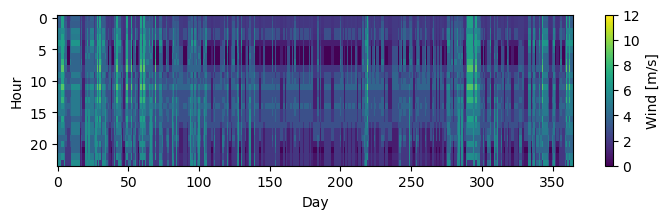

In [29]:
plotTS(predictedPeriods_predefClusterOrder['Wind'], 24, vmin = raw['Wind'].min(), vmax = raw['Wind'].max())

As it can be seen, the plot for the aggregated wind time series only and the one for four with the predefined cluster Order from the wind time series still differ from each other. This is because of the fact, that only the cluster Order, but not the cluster centers of each cluster are predefined. Since these are in one case deterined for the wind time series only and in the other case for all four attributes in common, the chosen cluster centers (chosen typical days) differ from each other

### Predefining cluster order and cluster centers

If the cluster order and the cluster centers should be taken from the wind time series clustering, we pass the information which days where chosen as typical days for the wind time series to the aggregation of all four typical attributes as well

In [30]:
aggregation_predefClusterOrderAndClusterCenters = tsam.TimeSeriesAggregation(raw, 
                                                  noTypicalPeriods = 8, hoursPerPeriod = 24, 
                                                  clusterMethod = 'hierarchical', 
                                                  predefClusterOrder=aggregation_wind.clusterOrder,
                                                  predefClusterCenterIndices=aggregation_wind.clusterCenterIndices)

In [31]:
typPeriods_predefClusterOrderAndClusterCenters = aggregation_predefClusterOrderAndClusterCenters.createTypicalPeriods()

In [32]:
typPeriods_predefClusterOrderAndClusterCenters.shape

(192, 4)

Save typical periods to .csv file

In [33]:
typPeriods_predefClusterOrderAndClusterCenters.to_csv(os.path.join('results','testperiods_predefClusterOrderAndClusterCenters.csv'))

In [34]:
predictedPeriods_predefClusterOrderAndClusterCenters = aggregation_predefClusterOrderAndClusterCenters.predictOriginalData()

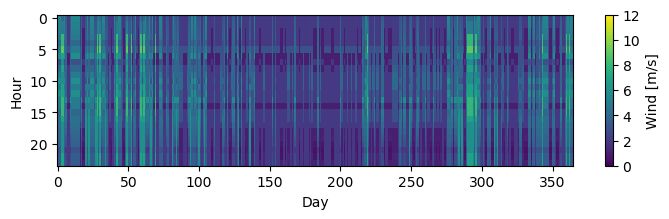

In [35]:
plotTS(predictedPeriods_predefClusterOrderAndClusterCenters['Wind'], 24, vmin = raw['Wind'].min(), vmax = raw['Wind'].max())

Now even the chosen typical days for the four attributes are the same as for the aggregated wind time series only